In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [2]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (100, 1)
y shape:  (100, 1)


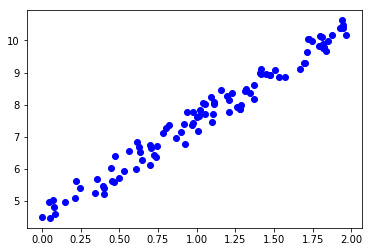

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, 'bo')

#### Normal Equation

$\hat{\theta} = (X^\intercal X)^{-1} X^\intercal y$

* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

In [4]:
X_b = np.c_[np.ones(shape=(100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.52502805],
       [2.9816901 ]])

$\theta_0 = 4$ and
$\theta_1 = 3$

Make predictions using $\theta$:

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.52502805],
       [10.48840825]])

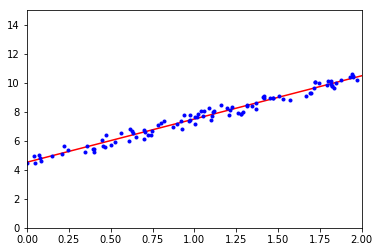

In [8]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### Perfoming linear regression using Sckit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.52502805]), array([[2.9816901]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.52502805],
       [10.48840825]])

#### Batch Gradient Descent 

Optimization algorithm

- It uses the whole traning set to compute the gradients at every step. Can be a problem! (Solving with Stochastic Gradient)

**Obs**: To find a good learning rate, can use grid search (GSV). However, may want to limit the number of iterations so that grid search can eliminate models that take too long to coverage.

**Obs**: To find best iteration number, set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny - that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the tolerance) - beacuse this happens when Gradient Descent has (almost) reached the minimum.

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
theta = np.random.randn(2, 1) # random initialization
m = 100

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.52502805],
       [2.9816901 ]])

#### Stochastic Gradient

Optimization algorithm 

- Just picks a random instance in the training set at every step and computes the gradients based only on that single instance. MUCH FASTER!
- Due to its stochastic nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimun, the cost functio will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never setting down. So once the algorithms stops, the final parameter values is good, but not optimal. One solution to this dilemma is to gradually reduce the learning rate.

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.52519211],
       [2.98541894]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/home/raphael-alencar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52203418]), array([2.98022646]))